In [ ]:
#Submission Dicoding
#Nama : Rofifah Nurul Annisa

import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
#mengambil data

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissors.zip

--2021-05-09 22:17:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  5.22MB/s    in 64s     

2021-05-09 22:18:22 (4.78 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [ ]:
#mengekstrak zip dari dataset yang diunduh
import zipfile 
local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir='/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
!pip install split-folders
import splitfolders

#membagi data menjadi 2 training dan validation, dengan rasio training 60% dan validation 40%
splitfolders.ratio(base_dir, output= base_dir + '/result', seed=1337, ratio=(.6,.4), group_prefix=None)

Copying files: 2188 files [00:00, 3141.37 files/s]


In [ ]:
train_dir = base_dir + '/result/train'
val_dir = base_dir + '/result/val'

In [ ]:
import os 

train_paper = os.path.join(train_dir, 'paper')

train_rock = os.path.join(train_dir, 'rock')

train_scissors = os.path.join(train_dir, 'scissors')

val_paper = os.path.join(val_dir, 'paper')

val_rock = os.path.join(val_dir, 'rock')

val_scissors = os.path.join(val_dir, 'scissors')



In [ ]:
#optional : untuk melihat jumlah data pada masing-masing folder training dan validation
print(len(os.listdir(train_paper)))
print(len(os.listdir(train_rock)))
print(len(os.listdir(train_scissors)))

print(len(os.listdir(val_paper)))
print(len(os.listdir(val_rock)))
print(len(os.listdir(val_scissors)))

427
435
450
285
291
300


In [ ]:
#melakukan augmentation sebelum menggunakan gambar (preprocessing)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.3,
                    horizontal_flip=True,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.3,
                    horizontal_flip=True,
                    fill_mode = 'nearest')

In [ ]:
#note : class mode categorical karena akan memprediksi 3 kelas
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size=(100, 100), 
        batch_size=32, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    
    #menambahkan neural network
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=15,
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

Epoch 1/15
20/20 - 23s - loss: 1.0820 - accuracy: 0.4266 - val_loss: 1.0278 - val_accuracy: 0.6375
Epoch 2/15
20/20 - 22s - loss: 0.9711 - accuracy: 0.6109 - val_loss: 0.9190 - val_accuracy: 0.5063
Epoch 3/15
20/20 - 22s - loss: 0.7826 - accuracy: 0.7125 - val_loss: 0.6797 - val_accuracy: 0.8062
Epoch 4/15
20/20 - 22s - loss: 0.6052 - accuracy: 0.8094 - val_loss: 0.5043 - val_accuracy: 0.8438
Epoch 5/15
20/20 - 22s - loss: 0.5076 - accuracy: 0.8188 - val_loss: 0.5699 - val_accuracy: 0.7750
Epoch 6/15
20/20 - 22s - loss: 0.4067 - accuracy: 0.8656 - val_loss: 0.3029 - val_accuracy: 0.9062
Epoch 7/15
20/20 - 22s - loss: 0.3854 - accuracy: 0.8687 - val_loss: 0.3458 - val_accuracy: 0.8625
Epoch 8/15
20/20 - 22s - loss: 0.2987 - accuracy: 0.8906 - val_loss: 0.5145 - val_accuracy: 0.7688
Epoch 9/15
20/20 - 22s - loss: 0.3117 - accuracy: 0.8875 - val_loss: 0.4374 - val_accuracy: 0.8062
Epoch 10/15
20/20 - 22s - loss: 0.2478 - accuracy: 0.9172 - val_loss: 0.4204 - val_accuracy: 0.8313
Epoch 11/

Saving 2JRYQXb5kmlhgD5i.png to 2JRYQXb5kmlhgD5i (1).png
2JRYQXb5kmlhgD5i.png
batu


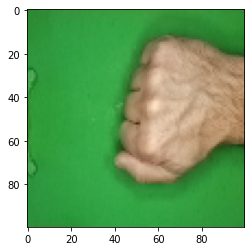

In [ ]:
from google.colab import files
from keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
%matplotlib inline

#untuk melakukan upload file  
to_upload = files.upload()
 
for i in to_upload.keys():
 
  path = i
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  klasifikasi = model.predict(images)
  hasil = np.argmax(klasifikasi)
  
  print(i)

  #pengecekan kondisi hasil
  if hasil == 0:
    print('kertas')

  elif hasil == 1:
    print('batu')

  elif hasil == 2:
    print('gunting')
